In [2]:
import os 
from src.data.text import load_json
import re
from tqdm import tqdm
from numpy import number
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
BASE_PATH = 'experiments/clean-motionfix' 

def get_metrs_n_guids(subpath, metr):
    path_for_exps = f'{BASE_PATH}/{subpath}'
    loxps=[ f.path for f in os.scandir(path_for_exps) if f.is_dir()]
    expname = '__'.join(path_for_exps.split('/')[-3:-1])
    print('=========={expname}=========')

    guidance_tnm = []
    guidance_m = []
    s2t_avgr_batch = []
    t2t_avgr_batch = []
    s2t_avgr_all = []
    t2t_avgr_all = []

    for x in tqdm(loxps):
        gd_comb = x.split('/')[-1]
        numbers = re.findall(r'\d+\.\d+', gd_comb)
        print(numbers)
        guidance_tnm.append(float(numbers[0]))
        guidance_m.append(float(numbers[1]))

        data_batch=load_json(x+'/batches_res.json')
        data_all=load_json(x+'/all_res.json')
        s2t_avgr_batch.append(float(data_batch[f'{metr}_s2t']))
        t2t_avgr_batch.append(float(data_batch[f'{metr}']))
        s2t_avgr_all.append(float(data_all[f'{metr}_s2t']))
        t2t_avgr_all.append(float(data_all[f'{metr}']))
        print('---')
    return guidance_tnm, guidance_m, s2t_avgr_batch, t2t_avgr_batch, s2t_avgr_all, t2t_avgr_all

/home/nathanasiou/.venvs/TMR/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def plot_values3d(x, y, z, xname, yname, zname):
    fig = plt.figure(layout="constrained")
    ax = fig.add_subplot(111, projection='3d')
    # fig, ax = plt.subplots(layout="constrained")
    # ax.plot(x, y, z)
    ax.plot(x, y, z, 'o')

    for i in range(len(x)):
        ax.text(x[i], y[i], z[i], f'({x[i]}, {y[i]})')


    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_zlabel(zname)
    plt.tight_layout()  # Adjust layout to prevent cropping

    ax.view_init(elev=20, azim=45)

    plt.show()


In [4]:
def plot_2d_3d_plot(x, y, z, xname, yname, invert_size=True):
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
    norm = Normalize(vmin=min(z), vmax=max(z))
    z_normalized = norm(z)  # Apply normalization
    
    # z_normalized = [(zi - min(z)) / (max(z) - min(z)) for zi in z]  # Normalize z values to range 0-1
    # z_area = [z_size * 1000 for z_size in z_normalized]  # Scale up for visibility
    # z_area = [(z_size + 0.1) ** 2 * 1000 for z_size in z_normalized]  # Exponential transformation
    if invert_size:
        # Invert the size scaling: bigger numbers get smaller circles
        z_area = [(1 - z_size + 0.1) ** 2 * 1000 for z_size in z_normalized]
    else:
        # Normal size scaling: bigger numbers get bigger circles
        z_area = [(z_size + 0.1) ** 2 * 1000 for z_size in z_normalized]
    
    colors = plt.cm.cividis(z_normalized)
    # Plot each point with an area proportional to z value
    scatter = ax.scatter(x, y, s=z_area, c=colors, alpha=0.8,
                         norm=norm, marker='o',
                         edgecolor='k', linewidth=0.5)  # Use 'o' as the marker for circles
    # Annotate each circle with its z value
    for i, txt in enumerate(z):
        ax.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,15), ha='center')
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_title('Plot of guidances and AvgR')

    # cbar = plt.colorbar(scatter, ax=ax)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='cividis'), ax=ax)
    
    cbar.set_label('AvgR')
    # Set the ticks of the colorbar to match the original z values
    # tick_positions = np.linspace(0, 1, 5)
    # tick_labels = np.linspace(min(z), max(z), 5)
    # cbar.set_ticks(tick_positions)  # Position of ticks
    # cbar.set_ticklabels(np.round(tick_labels, 2))  # Text of ticks
    tick_positions = np.linspace(min(z), max(z), 5)
    cbar.set_ticks(tick_positions)  # Position of ticks
    cbar.set_ticklabels(np.round(tick_positions, 2))  # Text of ticks
    cbar.ax.tick_params(labelsize=10)
    # Set the ticks of the colorbar to show five evenly spaced values
    
    # Adjust the plot's axes limits to add more space
    x_margin = 0.2  # Additional x margin
    y_margin = 0.2    # Additional y margin
    ax.set_xlim(min(x) - x_margin, max(x) + x_margin)
    ax.set_ylim(min(y) - y_margin, max(y) + y_margin)

    # Show the plot
    # plt.grid(True)  # Optional, adds a grid to the plot
    plt.show()


In [5]:
subpath = 'bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/steps_1000_bodilex_noise_last'
metric = 'AvgR'
g_tnm, g_m,  s2t_bt, t2t_bt, s2t_all, t2t_all = get_metrs_n_guids(subpath, 
                                                                 metr=metric)
plot_2d_3d_plot(guidance_tnm, guidance_m, s2t_avgr_batch,
                '$g_{t}^{m}$ guidance_tnm', '$g_m$')
#              'guidance_tnm', 'guidance_m', 's2t_avgr_batch')

=========={expname}=========


  0%|          | 0/25 [00:00<?, ?it/s]

['2.5', '2.0']


  4%|▍         | 1/25 [00:06<02:39,  6.66s/it]

---
['1.0', '2.0']


  8%|▊         | 2/25 [00:29<06:12, 16.22s/it]

---
['2.0', '3.0']


 12%|█▏        | 3/25 [00:31<03:30,  9.56s/it]

---
['3.0', '1.5']


/tmp/ipykernel_138024/2066055315.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent cropping


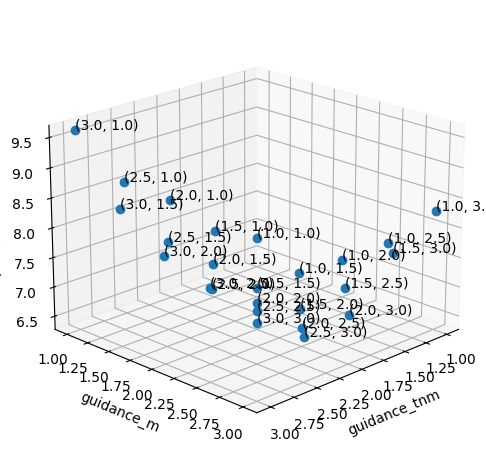

In [6]:
plot_values3d(guidance_tnm, guidance_m, s2t_avgr_batch, 
              'guidance_tnm', 'guidance_m', 's2t_avgr_batch')
plot_values3d(guidance_tnm, guidance_m, s2t_avgr_batch, 
              'guidance_tnm', 'guidance_m', 's2t_avgr_batch')

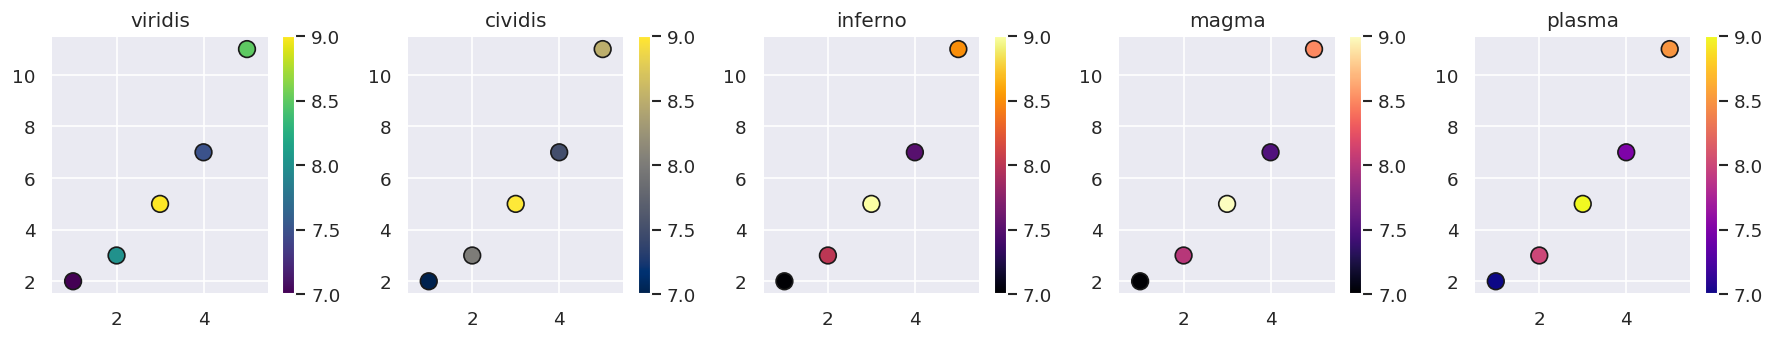

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
z = [7, 8, 9, 7.5, 8.5]

# Normalize the z values
norm = plt.Normalize(min(z), max(z))

# List of colormaps to display
colormaps = ['viridis', 'cividis', 'inferno', 'magma', 'plasma']

fig, axs = plt.subplots(1, 5, figsize=(15, 3), dpi=120)
for ax, cmap in zip(axs, colormaps):
    scatter = ax.scatter(x, y, c=z, cmap=cmap, s=100, norm=norm, edgecolor='k')
    ax.set_title(cmap)
    plt.colorbar(scatter, ax=ax, orientation='vertical')
    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(1.5, 11.5)

plt.tight_layout()
plt.show()
